# 手寫阿拉伯數字辨識 完整版

## 步驟1：載入 Cifar 10 資料

In [1]:
import tensorflow as tf
cifar10 = tf.keras.datasets.cifar10

# 載入 MNIST 手寫阿拉伯數字資料
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

# 訓練/測試資料的 X/y 維度
print(x_train.shape, y_train.shape,x_test.shape, y_test.shape)

170498071/170498071 [==============================] - 5s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


## 步驟2：資料清理，此步驟無需進行

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21345 (\N{CJK UNIFIED IDEOGRAPH-5361}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 36554 (\N{CJK UNIFIED IDEOGRAPH-8ECA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38738 (\N{CJK UNIFIED IDEOGRAPH-9752}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 34521 (\N{CJK UNIFIED IDEOGRAPH-86D9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29399 (\N{CJK UNIFIED IDEOGRAPH-72D7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

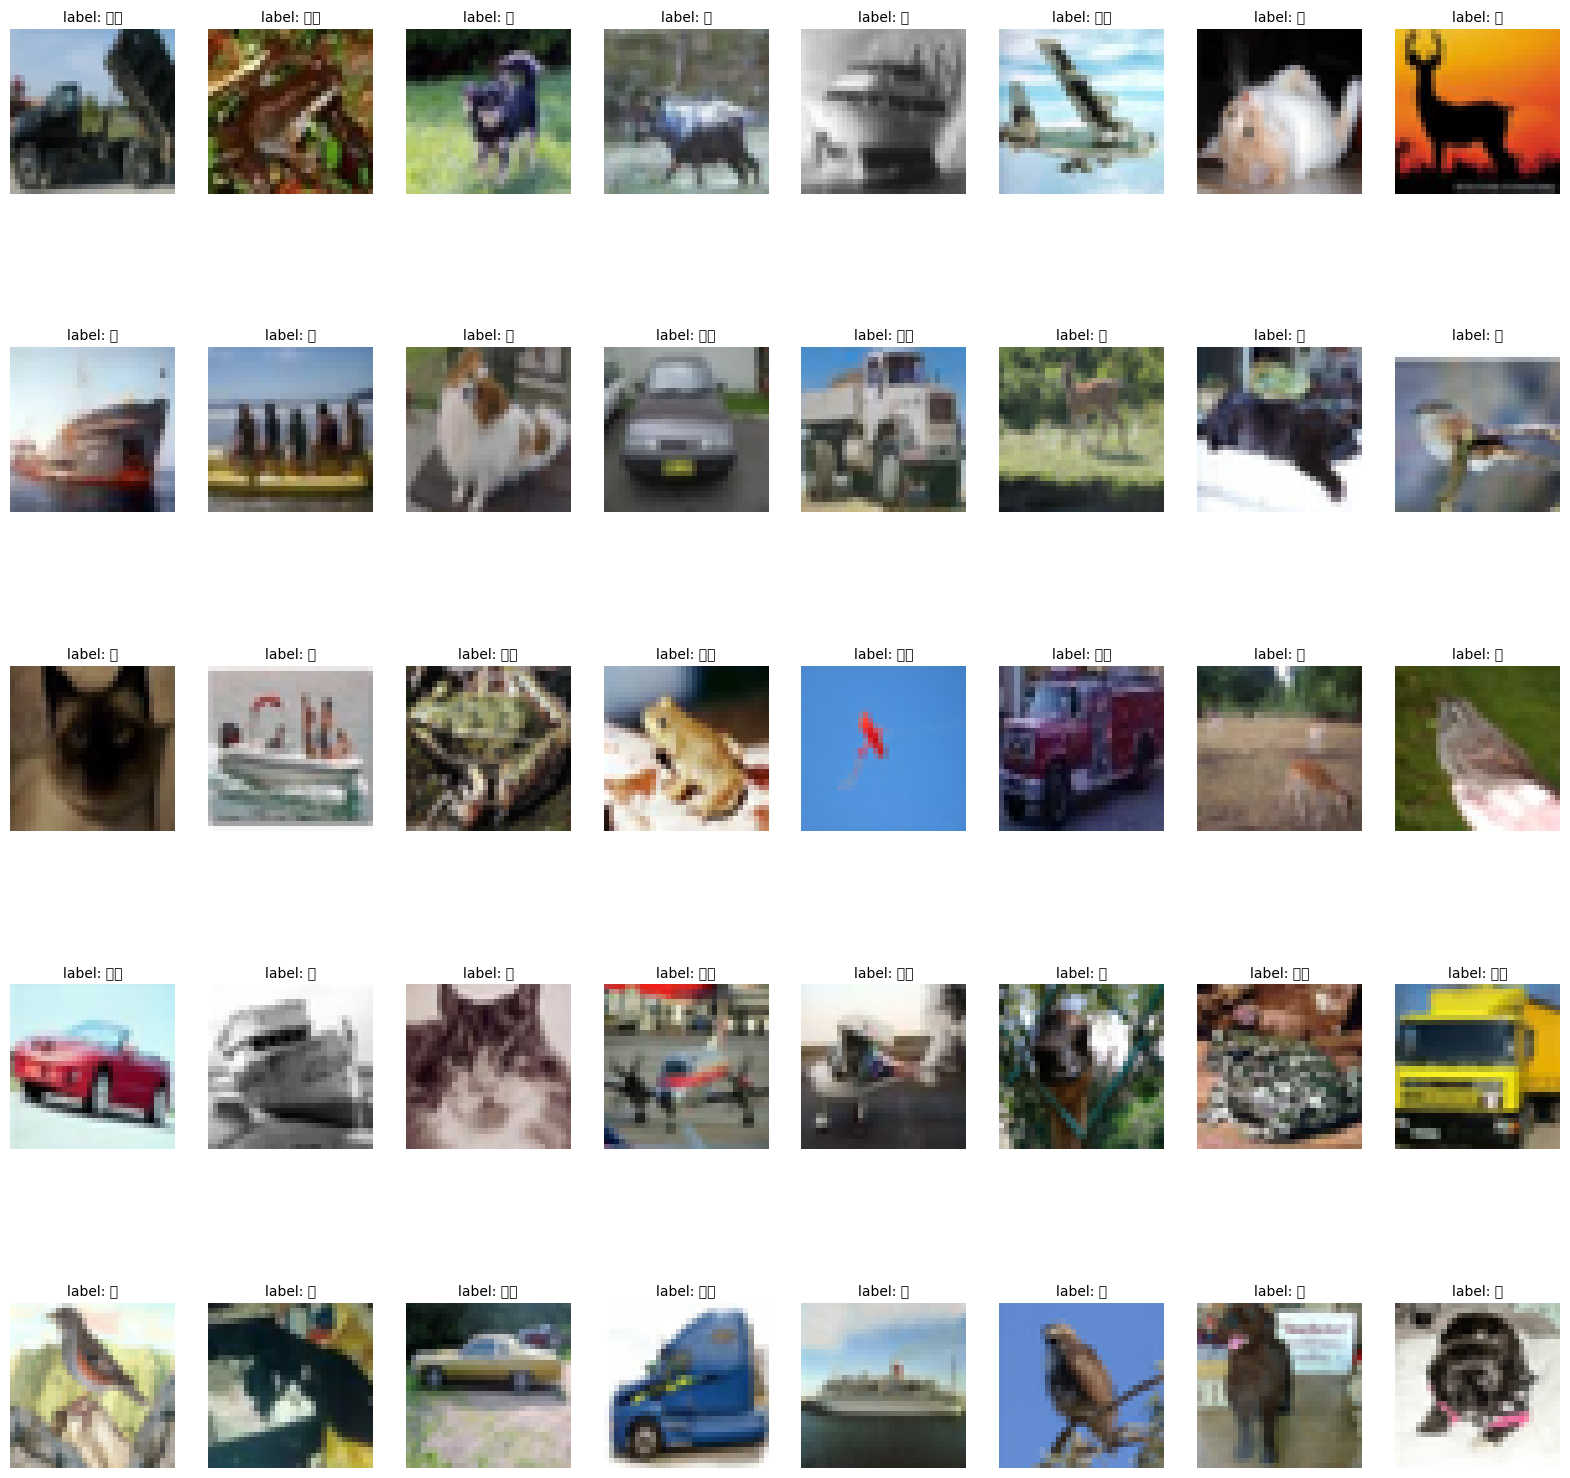

In [2]:
import matplotlib.pyplot as plt # pip install matplotlib
from random import randrange

text = ['飛機', '汽車', '鳥' ,'貓', '鹿', '狗', '青蛙', '馬', '船', '卡車']
plt.figure(figsize=(20,20),facecolor='w')
for i in range(5):
  for j in range(8):
    index = randrange(0, 50000)
    plt.subplot(5, 8,i*8+j+1)
    plt.title("label: {}".format(text[y_train[index][0]]), fontproperties="Microsoft YaHei")
    plt.imshow(x_train[index])
    plt.axis('off')

plt.show()

## 步驟3：進行特徵工程，將特徵縮放成(0, 1)之間

In [3]:
# 特徵縮放，使用常態化(Normalization)，公式 = (x - min) / (max - min)
# 顏色範圍：0~255，所以，公式簡化為 x / 255
# 注意，顏色0為白色，與RGB顏色不同，(0,0,0) 為黑色。
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
x_train_norm[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

## 步驟4：資料分割，此步驟無需進行，載入MNIST資料時，已經切割好了

## 步驟5：建立模型結構

## 步驟6：結合訓練資料及模型，進行模型訓練

## 步驟7：評分(Score Model)

In [4]:
# 建立模型
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), strides =(1,1), padding="same", activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# 設定優化器(optimizer)、損失函數(loss)、效能衡量指標(metrics)的類別
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# 模型訓練
history = model.fit(x_train_norm, y_train, epochs=10, validation_split=0.2)

# 評分(Score Model)
score=model.evaluate(x_test_norm, y_test, verbose=0)

for i, x in enumerate(score):
    print(f'{model.metrics_names[i]}: {score[i]:.4f}')

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1250/1250 [==============================] - 81s 64ms/step - loss: 1.5453 - accuracy: 0.4329 - val_loss: 1.2788 - val_accuracy: 0.5391
Epoch 2/10
1250/1250 [==============================] - 68s 54ms/step - loss: 1.1891 - accuracy: 0.5778 - val_loss: 1.1154 - val_accuracy: 0.6051
Epoch 3/10
1250/1250 [==============================] - 75s 60ms/step - loss: 1.0354 - accuracy: 0.6334 - val_loss: 1.0271 - val_accuracy: 0.6403
Epoch 4/10
1250/1250 [==============================] - 69s 55ms/step - loss: 0.9318 - accuracy: 0.6719 - val_loss: 0.9837 - val_accuracy: 0.6552
Epoch 5/10
1250/1250 [==============================] - 75s 60ms/step - loss: 0.8602 - accuracy: 0.6981 - val_loss: 0.9236 - val_accuracy: 0.6766
Epoch 6/10
1250/1250 [==============================] - 70s 56ms/step - loss: 0.8077 - accuracy: 0.7161 - val_loss: 0.9100 - val_accuracy: 0.6793
Epoch 7/10
1250/1250 [==============================] - 69s 55ms/step - loss: 0.7466 - accuracy: 0.7358 - val_loss: 0.9156 - val_accura

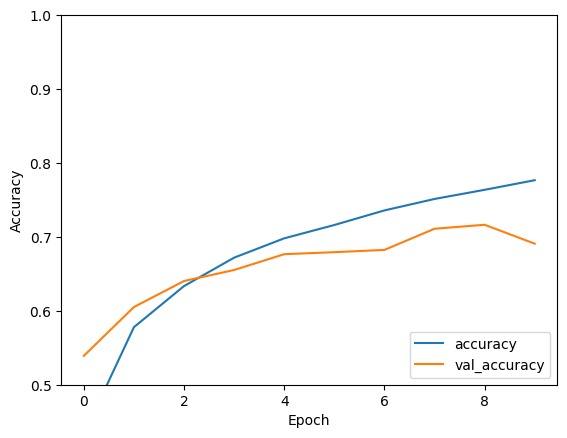

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

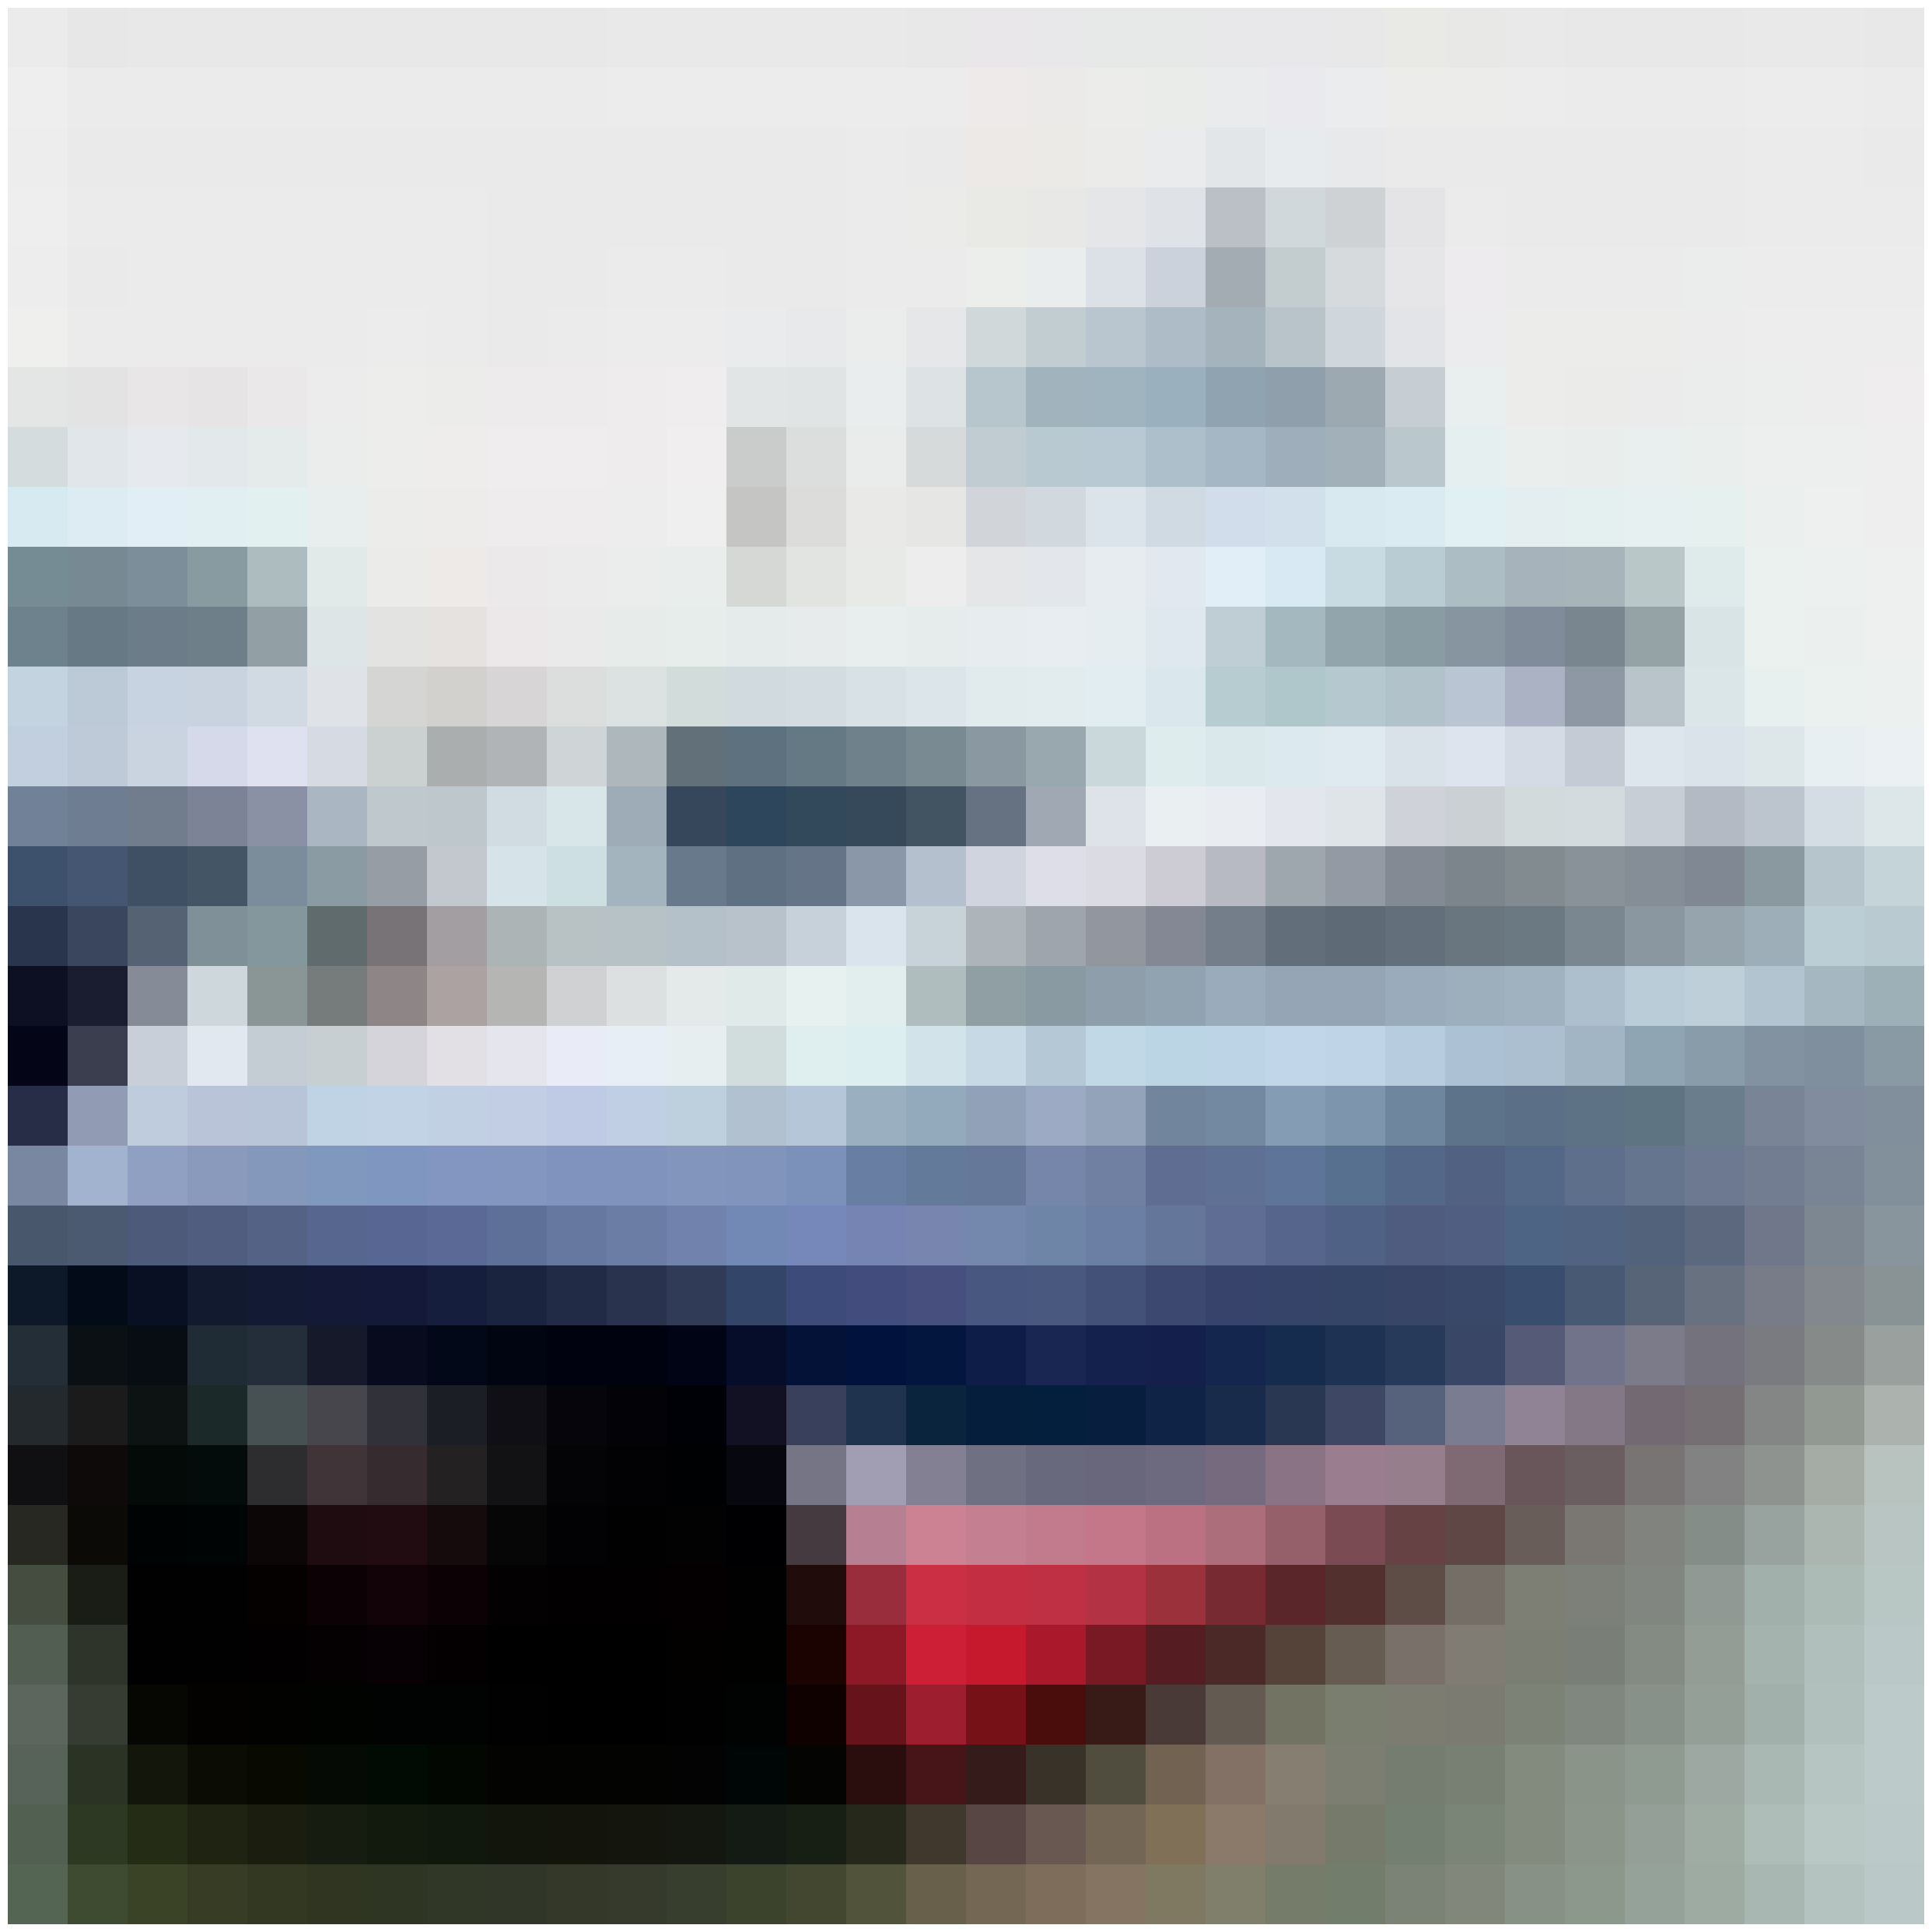

313/313 [==============================] - 5s 17ms/step
actual    : [8]
prediction: 8


In [7]:
# 實際預測資料
import matplotlib.pyplot as plt # pip install matplotlib
plt.figure(figsize=(32,32),facecolor='w')
plt.imshow(x_test[1])
plt.axis('off')
plt.show()
y_test[1] #船


# 實際預測資料
import numpy as np
# model.predict_classes 已在新版廢除
#predictions = model.predict_classes(x_test_norm)
predictions = np.argmax(model.predict(x_test_norm), axis=-1)

# 比對
print('actual    :', y_test[1])
print('prediction:', predictions[1])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1600)              0